In [1]:
import numpy as np
from scipy.sparse import csr_matrix, find
from scipy.spatial import cKDTree
from tqdm import tqdm_notebook as tqdm

from datasets.graph import draw_sample
import torch
import torch_geometric
import torch
import os
import os.path as osp


In [2]:
import glob
raw_dir= '/home/sameasy2006/npz_hgcal_pionaddsiminfo_all_k8/pion_hgctup_0to1000/clusters/'
fnamelist = [filepath for filepath in glob.glob(raw_dir+'data_*.pt')]
data_list = []
for i in tqdm(fnamelist):
    data_list.append(torch.load(i))
    
print((data_list[0].y))
print(data_list[0].pos)
print(len(data_list))
totalev = len(data_list)
#trainev = 

/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



tensor([116.2030])
None
8383


In [3]:
import torch_geometric
ntrainbatch = 40
ntestbatch = 1
trainloader = torch_geometric.data.DataLoader(data_list[:totalev-300], batch_size=ntrainbatch)
testloader = torch_geometric.data.DataLoader(data_list[totalev-300:totalev], batch_size=ntestbatch)

In [4]:
'''
import os.path as osp

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch_geometric.transforms as T
from torch_geometric.data import DataLoader
from tqdm import tqdm_notebook as tqdm


from models.DynamicReductionNetwork import DynamicReductionNetwork

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.drn = DynamicReductionNetwork()
        
    def forward(self, data):
        logits = self.drn(data)
#        return F.softmax(logits)
        return logits
device = torch.device('cpu')#('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)


#model.train()

for data in (loader):
        model.train()
        data = data.to(device)        
#        print (data.batch)
#        print (model(data))
#        print (data.y)
#        optimizer.zero_grad()

#        print(data.x)
        result = model(data)
        print(result)
#        mse = F.mse_loss(result, data.y, reduction='mean')


#        mse.backward()
#        print(mse)
#        optimizer.step
        break
        
'''

"\nimport os.path as osp\n\nimport torch\nimport torch.nn as nn\nimport torch.nn.functional as F\n\nimport torch_geometric.transforms as T\nfrom torch_geometric.data import DataLoader\nfrom tqdm import tqdm_notebook as tqdm\n\n\nfrom models.DynamicReductionNetwork import DynamicReductionNetwork\n\nclass Net(nn.Module):\n    def __init__(self):\n        super(Net, self).__init__()\n        self.drn = DynamicReductionNetwork()\n        \n    def forward(self, data):\n        logits = self.drn(data)\n#        return F.softmax(logits)\n        return logits\ndevice = torch.device('cpu')#('cuda' if torch.cuda.is_available() else 'cpu')\nmodel = Net().to(device)\noptimizer = torch.optim.AdamW(model.parameters(), lr=0.001)\n\n\n#model.train()\n\nfor data in (loader):\n        model.train()\n        data = data.to(device)        \n#        print (data.batch)\n#        print (model(data))\n#        print (data.y)\n#        optimizer.zero_grad()\n\n#        print(data.x)\n        result = model(

In [4]:
import os.path as osp

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch_geometric.transforms as T
from torch_geometric.data import DataLoader
from tqdm import tqdm_notebook as tqdm


from models.DynamicReductionNetwork import DynamicReductionNetwork

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.drn = DynamicReductionNetwork()
        
    def forward(self, data):
        logits = self.drn(data)
        return F.softplus(logits)
        #return logits
device = torch.device('cuda')#('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
#criterion = torch.nn.MSELoss()

model.train()
def train(epoch):
    model.train()
    loss = []
    for data in tqdm(trainloader):
            data = data.to(device)        
            optimizer.zero_grad()
            result = model(data)
            mse = F.mse_loss(result, data.y, reduction='mean')
#            mse = criterion(result, data.y)
#            print('result, y:',result,data.y)
#            print('crit, orig:',criterion(result, data.y),F.mse_loss(result, data.y, reduction='mean'))
            loss.append(mse.item()) 
            mse.backward()
#            print(mse)
            optimizer.step()
    print( 'batches for train:',len(loss)) 
#    print('loss',loss)
    print('train loss:',np.mean(np.array(loss))) 
#    print(data)

from scipy.stats import norm
import matplotlib.mlab as mlab
import scipy.stats as scs
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

def gaussian(x,  mean,a, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

def evaluate(epoch):
        """"Evaluate the model"""
        model.zero_grad()
        torch.cuda.empty_cache()
        model.eval()
        loss = []
        frac = []
        for data in tqdm(testloader):
            data = data.to(device)        
            result = model(data)
            mse = F.mse_loss(result, data.y, reduction='mean')
#            print (result.item(),data.y.item())
            frac.append((result.item() - data.y.item())/data.y.item())
            loss.append(mse.item()) 
        
        print('batches for test:', len(loss)) 
        print('test loss:',np.mean(np.array(loss)))
        fracarr = np.array(frac)
        print('pred - true / true mean:',(np.mean(fracarr)))
        print('pred - true / true std:',(np.std(fracarr)))
        (mu, sigma) = norm.fit(fracarr)
        print('mu,sig:',mu,sigma)
        
        

        '''
        ### for normalised 
        n, bins, patches = plt.hist(fracarr, 60, normed=1, facecolor='green', alpha=0.75)
        y = scs.norm.pdf( bins, mu, sigma)
        l = plt.plot(bins, y, 'r--', linewidth=2)

        #plot
        plt.xlabel('pred - true / true')
        plt.ylabel('counts')
        plt.title(r'$\mathrm{pred - true / true:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
        plt.grid(True)

        plt.show()
        
        
        '''
        bin_heights, bin_borders, _ = plt.hist(fracarr, bins='auto', label='histogram')
        bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
        popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[0., 100., 1.])
        print(popt)

        x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 100)
        plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit')
        plt.legend()
        
        
        plt.xlabel('pred - true / true')
        plt.ylabel('counts')
        #plt.title(r'$\mathrm{pred - true / true:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
        plt.title(r'$\mathrm{pred - true / true:}\ \mu=%.3f,\ \sigma=%.3f$' %(popt[0], popt[2]))
        plt.grid(True)

        plt.show()
        
        return np.mean(np.array(loss))
        

epoch: 1


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 91980.00238848907


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 13893.16145335277
pred - true / true mean: -0.16292976304170204
pred - true / true std: 0.39553584303164835
mu,sig: -0.16292976304170204 0.39553584303164835
[-0.14453762 48.37272714  0.17263187]


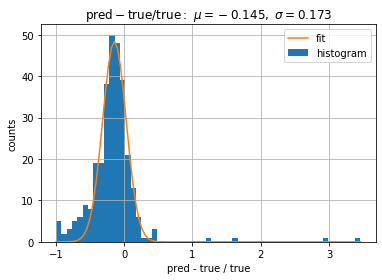

new best test loss: 13893.16145335277
epoch: 2


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 10104.924668786562


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 9159.506180454195
pred - true / true mean: 0.060492953100541744
pred - true / true std: 0.6391547751046774
mu,sig: 0.060492953100541744 0.6391547751046774
[-0.05235022 50.28889671  0.16437012]


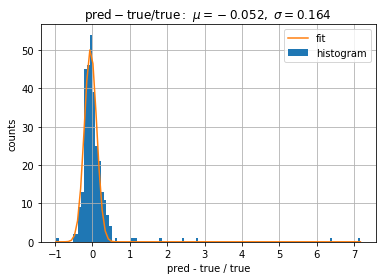

new best test loss: 9159.506180454195
epoch: 3


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 8971.228929341132


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 10382.91836062648
pred - true / true mean: 0.008205467289242098
pred - true / true std: 0.6116164198215636
mu,sig: 0.008205467289242098 0.6116164198215636
[-0.09981898 50.45678301  0.16054459]


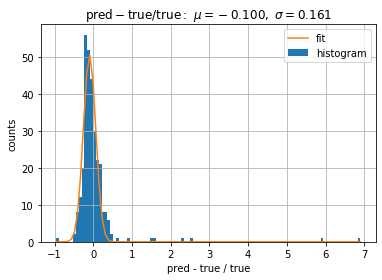

epoch: 4


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 8559.370894107913


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 8865.504888554215
pred - true / true mean: 0.06134043912728981
pred - true / true std: 0.6596987063168049
mu,sig: 0.06134043912728981 0.6596987063168049
[-0.06618576 49.5868463   0.14390127]


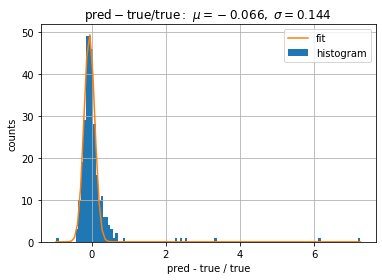

new best test loss: 8865.504888554215
epoch: 5


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 8245.543098637623


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 8395.38671500462
pred - true / true mean: 0.13411059883757243
pred - true / true std: 0.794544112280428
mu,sig: 0.13411059883757243 0.794544112280428
[-1.66004177e-02  5.24146315e+01  1.63945220e-01]


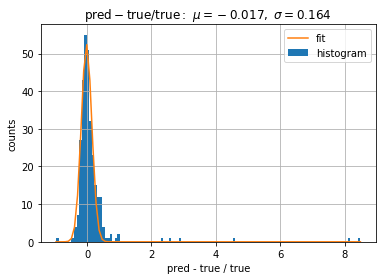

new best test loss: 8395.38671500462
epoch: 6


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 8193.037958455203


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 8668.031039119376
pred - true / true mean: 0.17895939530753507
pred - true / true std: 0.7686384373130293
mu,sig: 0.17895939530753507 0.7686384373130293
[2.32633090e-02 5.02295055e+01 1.81750221e-01]


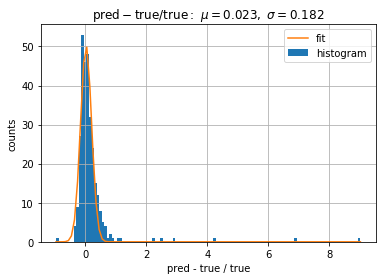

epoch: 7


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 8323.985061720674


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 8734.346459996153
pred - true / true mean: 0.13071798976798177
pred - true / true std: 0.7763257431423845
mu,sig: 0.13071798976798177 0.7763257431423845
[-3.01616429e-02  5.13718820e+01  1.53487522e-01]


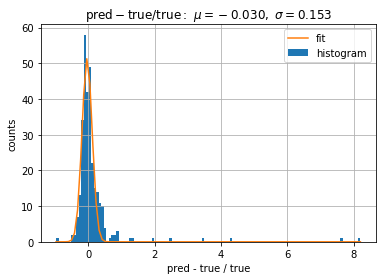

epoch: 8


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 8252.626142530018


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 9266.760580446471
pred - true / true mean: 0.14200519209255877
pred - true / true std: 0.9269720240291879
mu,sig: 0.14200519209255877 0.9269720240291879
[-3.22681154e-02  5.10578848e+01  1.68479046e-01]


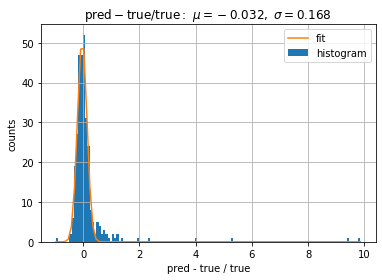

epoch: 9


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 7944.3359988358225


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 8621.218795756897
pred - true / true mean: 0.12799316715910064
pred - true / true std: 0.8590460130826852
mu,sig: 0.12799316715910064 0.8590460130826852
[-2.71041636e-02  5.32376962e+01  1.55206047e-01]


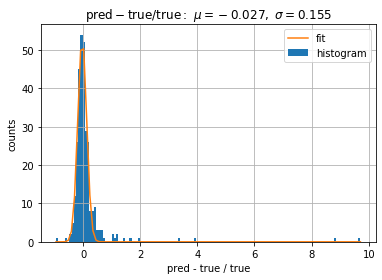

epoch: 10


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 7097.049507629695


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 8828.449113792032
pred - true / true mean: 0.03206749254410268
pred - true / true std: 0.6550043247484522
mu,sig: 0.03206749254410268 0.6550043247484522
[-0.08540225 49.14560932  0.13532016]


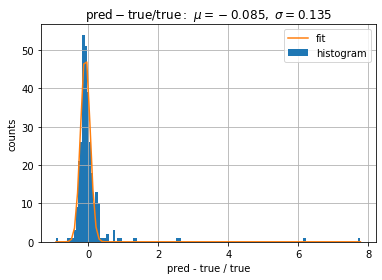

epoch: 11


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 6880.002607373768


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 9312.606271545645
pred - true / true mean: -0.02127537000100497
pred - true / true std: 0.4868018620975972
mu,sig: -0.02127537000100497 0.4868018620975972
[-0.08996001 46.19726563  0.12814797]


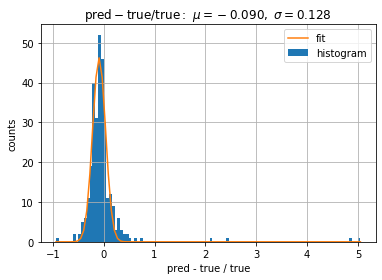

epoch: 12


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 6900.618926550955


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 8676.769643598447
pred - true / true mean: -0.009821546888881762
pred - true / true std: 0.6052532932295531
mu,sig: -0.009821546888881762 0.6052532932295531
[-0.09575235 47.93280503  0.11830269]


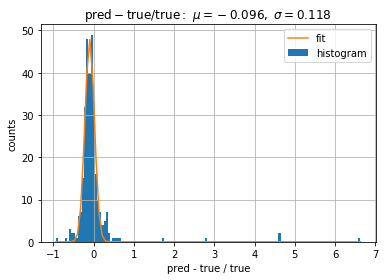

epoch: 13


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 6441.07013450585


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 8165.927640803299
pred - true / true mean: 0.011514243287400477
pred - true / true std: 0.6381615030381714
mu,sig: 0.011514243287400477 0.6381615030381714
[-0.08292565 47.74767359  0.12822342]


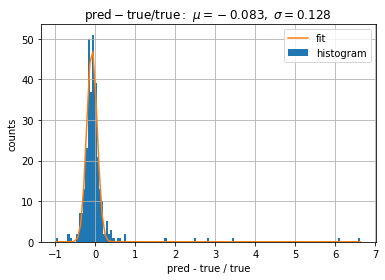

new best test loss: 8165.927640803299
epoch: 14


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 6259.081079943427


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 7048.646418732349
pred - true / true mean: 0.0007413486830537123
pred - true / true std: 0.444696241967269
mu,sig: 0.0007413486830537123 0.444696241967269
[-0.04756927 45.91424924  0.13044932]


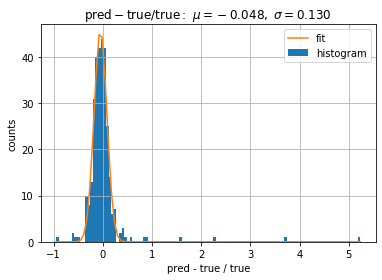

new best test loss: 7048.646418732349
epoch: 15


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 5917.426651376809


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 8530.91872275781
pred - true / true mean: 0.029601349015326194
pred - true / true std: 0.646905149824423
mu,sig: 0.029601349015326194 0.646905149824423
[-0.07590565 48.23170607  0.13338505]


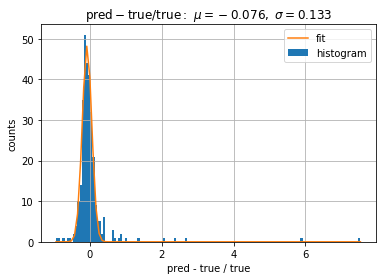

epoch: 16


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 6428.769994876655


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 6503.166437331053
pred - true / true mean: 0.09473748348478866
pred - true / true std: 0.678359239258017
mu,sig: 0.09473748348478866 0.678359239258017
[-1.62547461e-02  5.05355994e+01  1.36338341e-01]


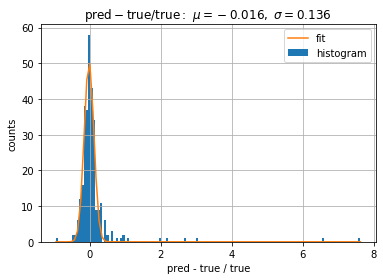

new best test loss: 6503.166437331053
epoch: 17


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 5684.926917766703


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 5576.2526346473305
pred - true / true mean: 0.09136955403250002
pred - true / true std: 0.4902760523693714
mu,sig: 0.09136955403250002 0.4902760523693714
[ 1.44864340e-02  4.84510848e+01 -1.35265343e-01]


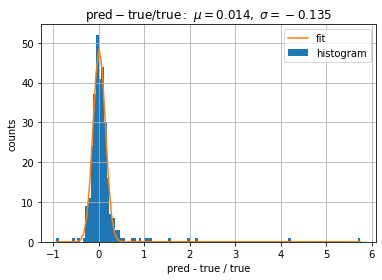

new best test loss: 5576.2526346473305
epoch: 18


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 5690.868057626809


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 5734.622594463465
pred - true / true mean: 0.06489421642455422
pred - true / true std: 0.5654686940861551
mu,sig: 0.06489421642455422 0.5654686940861551
[-1.03437047e-02  4.71037914e+01 -1.23588987e-01]


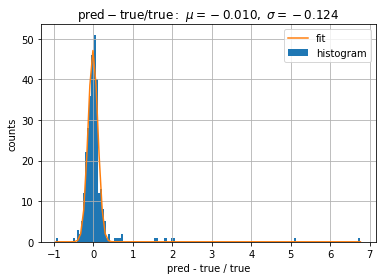

epoch: 19


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 5526.287161690848


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 5984.785843731339
pred - true / true mean: 0.117631131365427
pred - true / true std: 0.6728788040613982
mu,sig: 0.117631131365427 0.6728788040613982
[1.44034631e-02 4.80853243e+01 1.37456400e-01]


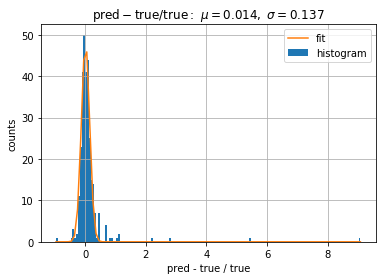

epoch: 20


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 203
train loss: 5458.680852880619


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 300
test loss: 7727.025746527156
pred - true / true mean: 0.04191448809122356
pred - true / true std: 0.653541697368555
mu,sig: 0.04191448809122356 0.653541697368555
[-0.06228686 48.86049173  0.12427272]


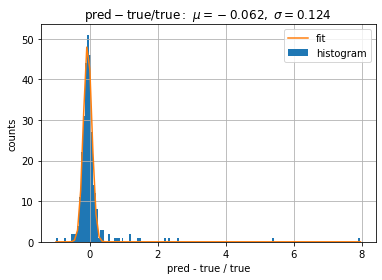

epoch: 21


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


KeyboardInterrupt: 

In [5]:
checkpoint_dir = '/home/sameasy2006/hgcal_ldrd-gravnet2_wip_trainer_args/ouput_regression_test/'
os.makedirs(checkpoint_dir, exist_ok=True)
best_loss = 99999999
for epoch in range(1, 60):
    print ('epoch:',epoch)
    train(epoch)
    loss_epoch = evaluate(epoch)
    checkpoint_file = 'model_epoch_%03i.pth.tar' % ( epoch )
    torch.save(dict(model=model.state_dict()),
                   os.path.join(checkpoint_dir,checkpoint_file ))
    if loss_epoch < best_loss:
        best_loss = loss_epoch
        print('new best test loss:',best_loss)
        torch.save(dict(model=model.state_dict()),
                   os.path.join(checkpoint_dir,'model_checkpoint_best.pth.tar' ))

In [6]:
model_fname = '/home/sameasy2006/hgcal_ldrd-gravnet2_wip_trainer_args/ouput_regression_test/model_checkpoint_best.pth.tar'
mdl=Net().to(device)
mdl.load_state_dict(torch.load(model_fname)['model'])
mdl.eval()


Net(
  (drn): DynamicReductionNetwork(
    (inputnet): Sequential(
      (0): Linear(in_features=5, out_features=128, bias=True)
      (1): ELU(alpha=1.0)
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): ELU(alpha=1.0)
      (4): Linear(in_features=128, out_features=64, bias=True)
      (5): ELU(alpha=1.0)
    )
    (edgeconv1): EdgeConv(nn=Sequential(
      (0): Linear(in_features=128, out_features=96, bias=True)
      (1): ELU(alpha=1.0)
      (2): Linear(in_features=96, out_features=64, bias=True)
      (3): ELU(alpha=1.0)
    ))
    (edgeconv2): EdgeConv(nn=Sequential(
      (0): Linear(in_features=128, out_features=96, bias=True)
      (1): ELU(alpha=1.0)
      (2): Linear(in_features=96, out_features=64, bias=True)
      (3): ELU(alpha=1.0)
    ))
    (output): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): ELU(alpha=1.0)
      (2): Linear(in_features=64, out_features=32, bias=True)
      (3): ELU(alpha=1.0)
      (4

In [7]:
#mdl.zero_grad()
torch.cuda.empty_cache()
#model.eval()
pred = []
true = []
#testloader2 = torch_geometric.data.DataLoader(data_list[totalev-3000:totalev], batch_size=1)
testloader2 = torch_geometric.data.DataLoader(data_list, batch_size=1)
for data in tqdm(testloader2):
    data = data.to(device)        
    result = F.softplus(mdl(data))
    #print(result.item())
    pred.append(result.item())
    true.append(data.y.item())
    
    
#print(pred)
#print(true)


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [77]:
def plotpred(pred,true,e1,e2):
#    preda = np.array(pred)
#    truea = np.array(true)
    fracarr = (pred - true)/true
    bin_heights, bin_borders, _ = plt.hist(fracarr, bins='auto', label='histogram')
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    popt, pcov = curve_fit(gaussian, bin_centers, bin_heights, p0=[0., 100., 2.],bounds = ([-np.inf,0,0],[np.inf,np.inf,np.inf]))
    perr = np.sqrt(np.diag(pcov))
    print(popt,perr)

    x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 100)
    plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit')
    plt.legend()


    plt.xlabel('pred - true / true')
    plt.ylabel('counts')
    #plt.title(r'$\mathrm{pred - true / true:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
    plt.title(r'$\mathrm{pred - true / true:}\ \mu=%.3f,\ \sigma=%.3f,\ E=$%i to %i' %(popt[0], popt[2],e1,e2))
    plt.grid(True)
    
    plt.show()
    return [popt[0], popt[2],perr[0], perr[2]]

5
[7.15789161e-02 1.96849225e+02 2.43641608e-01] [0.00317556 2.22195021 0.0031756 ]


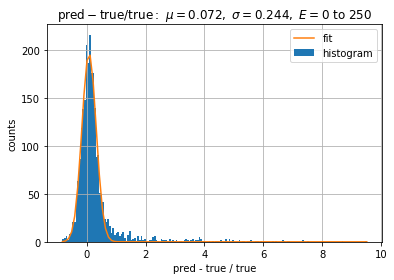

[3.63278721e-02 1.76268927e+02 1.32469238e-01] [2.24940797e-03 2.59254685e+00 2.25135431e-03]


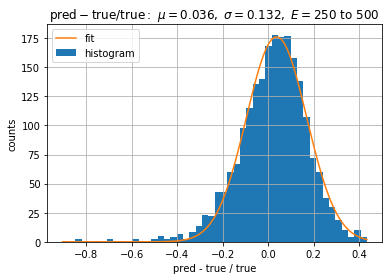

[4.29233816e-02 1.65512088e+02 1.01096727e-01] [1.76985596e-03 2.50934961e+00 1.76985620e-03]


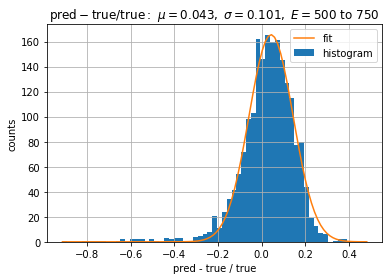

[-1.62485582e-02  1.62993108e+02  7.02546706e-02] [1.25152716e-03 2.51462461e+00 1.25163721e-03]


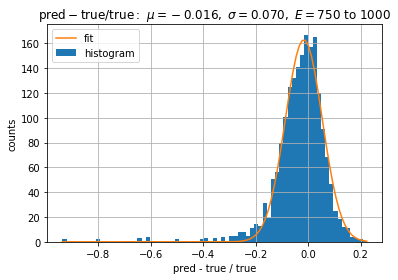

In [78]:
bins =  np.linspace(0,1000,5)
print(bins.size)
pred = np.array(pred)
true = np.array(true)
for i in range (bins.size - 1):
    preda = pred[(true >bins[i]) & (true <bins[i+1]) ]
    truea = true[(true >bins[i]) & (true <bins[i+1]) ]
    plotpred(preda,truea,bins[i],bins[i+1])
   

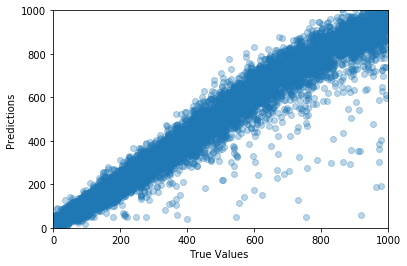

In [79]:
plt.scatter(true, pred,alpha=0.3)#,label='uncorr')

plt.xlabel('True Values ')
plt.ylabel('Predictions ')
#plt.legend(loc='upper right')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)                                                                                                                                               
#plt.savefig('energyscatt.png')
#plt.close()
plt.show()

11
[ 2.24252606 30.57987126  2.14054077] [0.1375195  1.51683256 0.15458466]


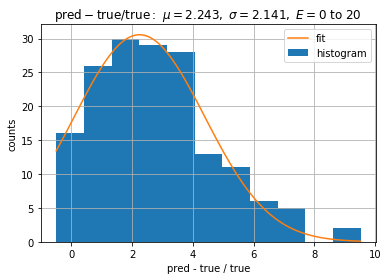

[ 0.32062819 31.59887349  0.65088589] [0.06878302 2.84922077 0.07404505]


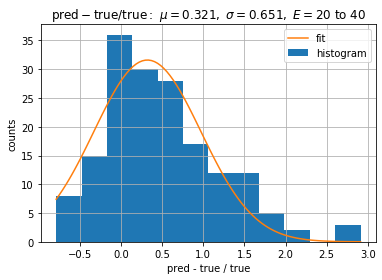

[ 0.29126425 32.46736329  0.53890912] [0.05787704 3.00394706 0.06133726]


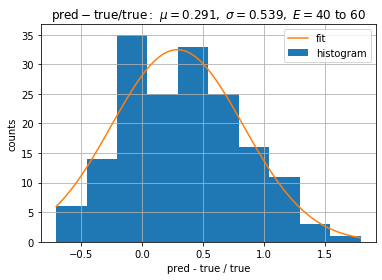

[ 0.18548112 31.91879761  0.38513587] [0.03160949 2.26429633 0.03403592]


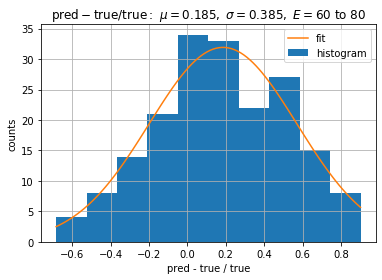

[ 0.17640783 36.46176425  0.28325576] [0.024539   2.73738753 0.02466352]


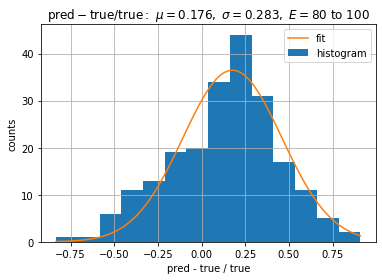

[ 0.09875021 39.95836394  0.23003634] [0.01517487 2.28328883 0.01519333]


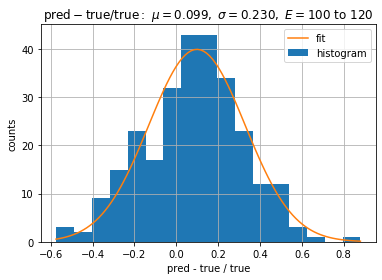

[ 0.08462779 35.0147745   0.22360922] [0.0113278  1.53740304 0.01139628]


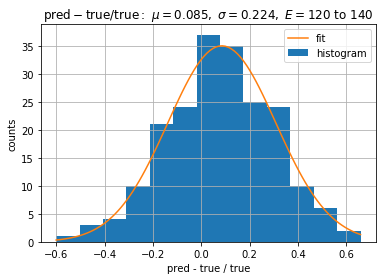

[ 0.05117106 39.12346785  0.24599538] [0.01037822 1.43119758 0.01048088]


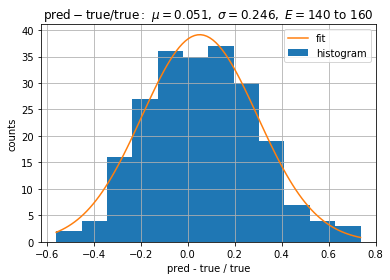

[3.35749183e-03 3.42034501e+01 2.15912521e-01] [0.01240079 1.7013524  0.01240376]


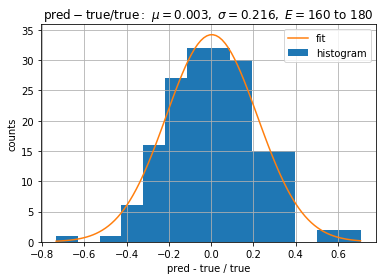

[-9.21506185e-03  2.83633853e+01  2.20572827e-01] [0.01251944 1.39477922 0.01302552]


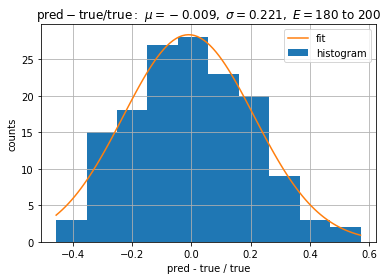

In [101]:
bins =  np.linspace(0,200,11)
bins2 = np.linspace(200,1000,6)
print(bins.size)
pred = np.array(pred)
true = np.array(true)
seoe = []
for i in range (bins.size - 1):
    preda = pred[(true >bins[i]) & (true <bins[i+1]) ]
    truea = true[(true >bins[i]) & (true <bins[i+1]) ]
    vals = plotpred(preda,truea,bins[i],bins[i+1])
    #seoe.append(vals[1]/bins[i+1])
    #print (bins[i],bins[i+1])
#seoear = np.array(seoe)

[   0.   20.   40.   60.   80.  100.  120.  140.  160.  180.  200.  250.
  300.  350.  400.  450.  500.  550.  600.  650.  700.  750.  800.  850.
  900.  950. 1000.]
[ 2.24252606 30.57987126  2.14054077] [0.1375195  1.51683256 0.15458466]


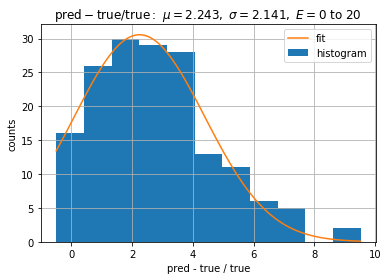

[2.242526055318245, 2.1405407739390565, 0.13751950048559033, 0.1545846609238814]
[ 0.32062819 31.59887349  0.65088589] [0.06878302 2.84922077 0.07404505]


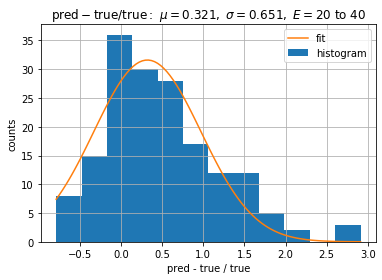

[0.320628192060263, 0.6508858858080343, 0.06878301887980434, 0.07404505368137318]
[ 0.29126425 32.46736329  0.53890912] [0.05787704 3.00394706 0.06133726]


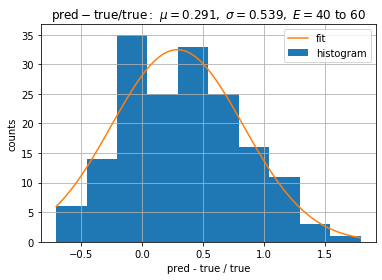

[0.2912642543552067, 0.5389091174031879, 0.05787703511677197, 0.061337257847569306]
[ 0.18548112 31.91879761  0.38513587] [0.03160949 2.26429633 0.03403592]


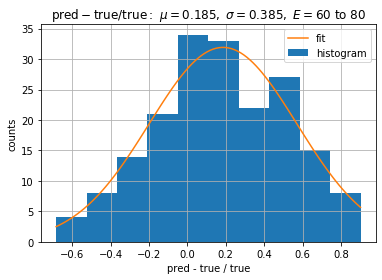

[0.18548111878406937, 0.3851358678136148, 0.03160948736731686, 0.03403592462643286]
[ 0.17640783 36.46176425  0.28325576] [0.024539   2.73738753 0.02466352]


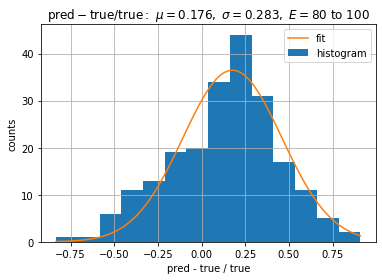

[0.17640783415785952, 0.2832557629400117, 0.024539004497302296, 0.024663515943144535]
[ 0.09875021 39.95836394  0.23003634] [0.01517487 2.28328883 0.01519333]


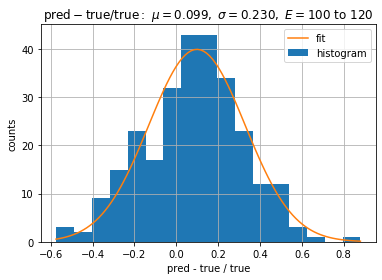

[0.098750210298003, 0.23003633941330157, 0.015174866449209571, 0.015193329807523352]
[ 0.08462779 35.0147745   0.22360922] [0.0113278  1.53740304 0.01139628]


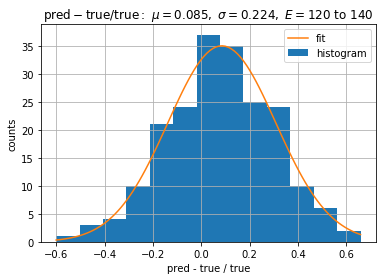

[0.08462778872377986, 0.22360921694571148, 0.011327796265602841, 0.011396281792606322]
[ 0.05117106 39.12346785  0.24599538] [0.01037822 1.43119758 0.01048088]


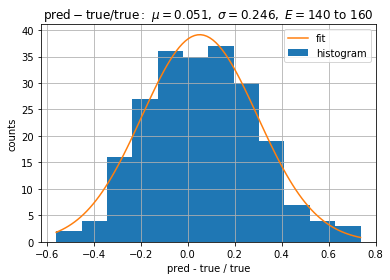

[0.05117105916100192, 0.24599537613332048, 0.010378221920895978, 0.010480880224960918]
[3.35749183e-03 3.42034501e+01 2.15912521e-01] [0.01240079 1.7013524  0.01240376]


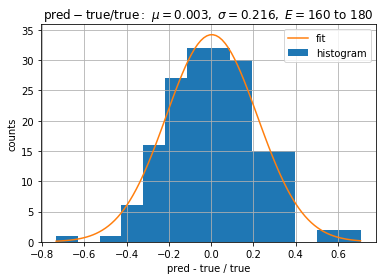

[0.0033574918312648592, 0.2159125207457725, 0.012400789464114145, 0.012403761897804998]
[-9.21506185e-03  2.83633853e+01  2.20572827e-01] [0.01251944 1.39477922 0.01302552]


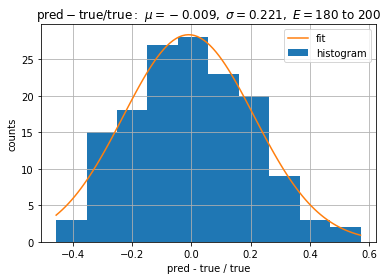

[-0.00921506185202093, 0.22057282694708258, 0.012519437462171663, 0.013025521400526416]
[5.62944590e-02 6.47107387e+01 1.71293922e-01] [0.00611671 2.00184542 0.0061299 ]


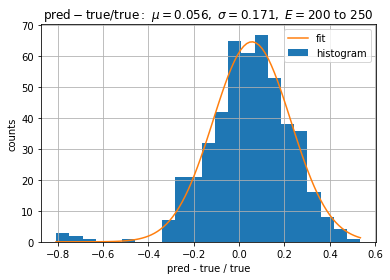

[0.056294458998499636, 0.17129392211670677, 0.006116712266264272, 0.006129896265319442]
[3.01210079e-02 5.79112979e+01 1.46723217e-01] [0.00619502 2.11846876 0.00621271]


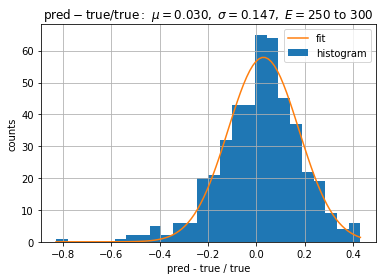

[0.03012100793898697, 0.1467232167238871, 0.006195019519045719, 0.006212706393018653]
[4.16373389e-02 6.60907230e+01 1.24826633e-01] [0.00502621 2.30519419 0.00503323]


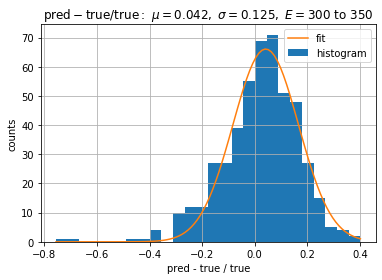

[0.041637338917432584, 0.12482663349994146, 0.005026212083626757, 0.0050332310533528915]
[2.54615215e-02 5.82100682e+01 1.37801089e-01] [0.00442676 1.61970472 0.00443098]


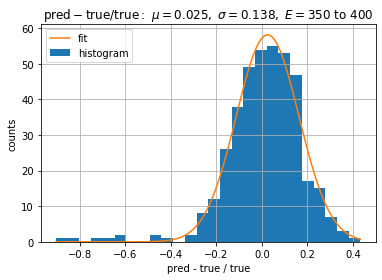

[0.02546152149972892, 0.13780108916640554, 0.004426756752359721, 0.004430980862882867]
[3.13004124e-02 5.71550803e+01 1.33325621e-01] [0.00578813 2.15093356 0.00582722]


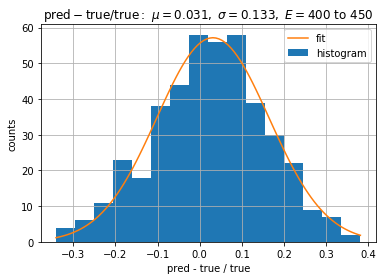

[0.03130041235594259, 0.13332562142857668, 0.005788133064370079, 0.00582722313302374]
[4.86706268e-02 5.74699364e+01 1.23328187e-01] [0.00763649 3.08216816 0.00764153]


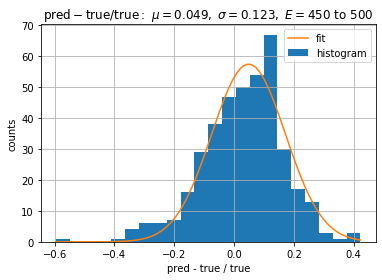

[0.04867062678796496, 0.12332818669231871, 0.00763649258894305, 0.007641526146248556]
[4.39739240e-02 5.67009044e+01 1.24586291e-01] [0.00406649 1.60278081 0.00406666]


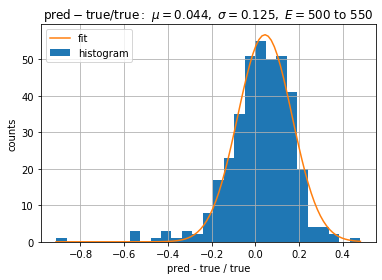

[0.04397392403191798, 0.12458629122030748, 0.0040664892047018435, 0.004066662169514055]
[4.53474240e-02 5.77038511e+01 1.01620797e-01] [0.00249725 1.22806713 0.00249743]


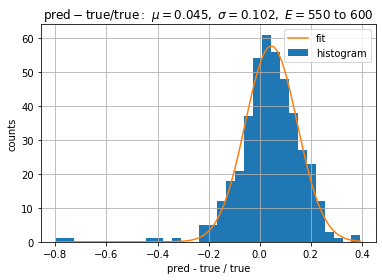

[0.045347424031574206, 0.10162079702181666, 0.002497253527292122, 0.002497427771336302]
[5.01768779e-02 5.57448196e+01 1.08194488e-01] [0.0070945  3.16586585 0.00709795]


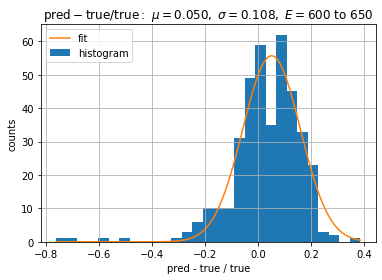

[0.050176877862714304, 0.10819448766897874, 0.007094501861942199, 0.007097954615749963]
[4.75554108e-02 5.04996920e+01 8.42140487e-02] [0.00332761 1.72830683 0.0033298 ]


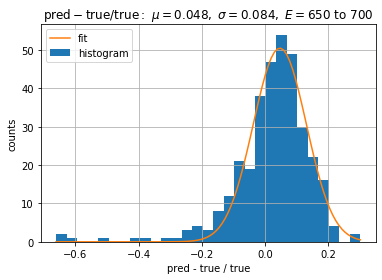

[0.04755541079131656, 0.08421404872495501, 0.00332761256775865, 0.0033297963506436676]
[3.31650790e-02 6.17932705e+01 8.86582714e-02] [0.00242973 1.46256025 0.00254015]


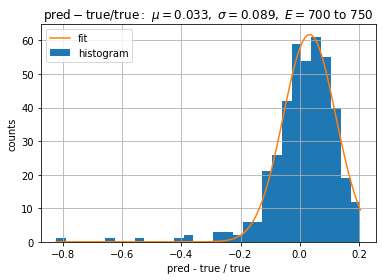

[0.0331650790402554, 0.08865827135369253, 0.002429731793894321, 0.0025401497208177486]
[9.83338663e-03 5.62731703e+01 6.71280336e-02] [0.00305834 2.22044273 0.00305925]


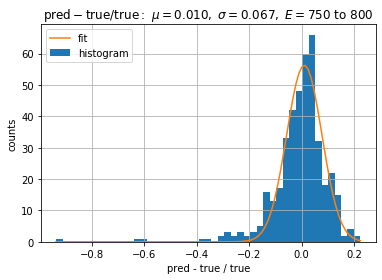

[0.009833386630856006, 0.06712803359957782, 0.003058339187104006, 0.0030592475447033993]
[8.01234203e-03 5.51896927e+01 6.62173814e-02] [0.00238871 1.72588463 0.0024148 ]


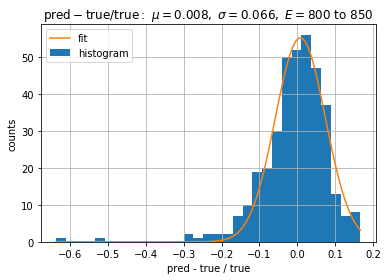

[0.008012342032368733, 0.06621738142723521, 0.0023887051590548896, 0.0024147953710068424]
[-2.34741675e-03  5.83232991e+01  6.61094072e-02] [0.00253386 1.93718897 0.00254633]


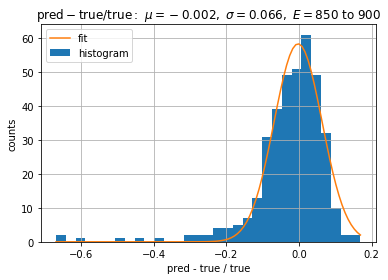

[-0.0023474167493730863, 0.06610940722355517, 0.0025338596343009397, 0.002546328979495851]
[-3.99669010e-02  5.22415119e+01  6.28968254e-02] [0.00158462 1.140859   0.00159816]


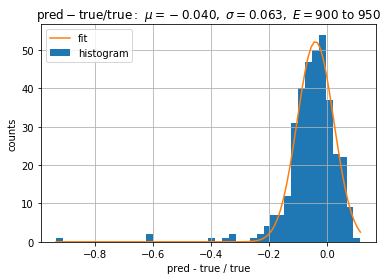

[-0.03996690103965246, 0.06289682536215081, 0.0015846236234670387, 0.0015981630266853524]
[-4.85044458e-02  5.77292744e+01  5.98993511e-02] [0.00229023 1.91348736 0.00231632]


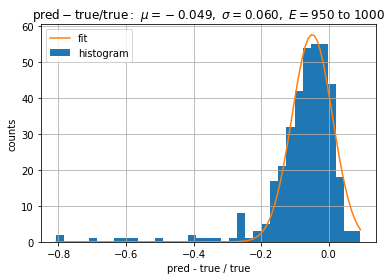

[-0.04850444577815338, 0.059899351087657336, 0.002290232819655517, 0.0023163159972481844]
[2.14054077 0.65088589 0.53890912 0.38513587 0.28325576 0.23003634
 0.22360922 0.24599538 0.21591252 0.22057283 0.17129392 0.14672322
 0.12482663 0.13780109 0.13332562 0.12332819 0.12458629 0.1016208
 0.10819449 0.08421405 0.08865827 0.06712803 0.06621738 0.06610941
 0.06289683 0.05989935] 
 [0.15458466 0.07404505 0.06133726 0.03403592 0.02466352 0.01519333
 0.01139628 0.01048088 0.01240376 0.01302552 0.0061299  0.00621271
 0.00503323 0.00443098 0.00582722 0.00764153 0.00406666 0.00249743
 0.00709795 0.0033298  0.00254015 0.00305925 0.0024148  0.00254633
 0.00159816 0.00231632]


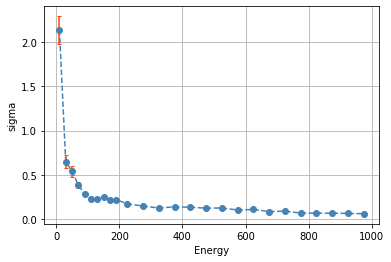

In [117]:
#bins =  np.linspace(0,1000,21)
#bins =  np.linspace(0,250,6)
bins =  np.linspace(0,200,11)
bins2 = np.linspace(250,1000,16)
bins = np.append(bins,bins2)
print(bins)

pred = np.array(pred)
true = np.array(true)
seoe = []
seoer = []
for i in range (bins.size - 1):
    preda = pred[(true >bins[i]) & (true <bins[i+1]) ]
    truea = true[(true >bins[i]) & (true <bins[i+1]) ]
    vals = plotpred(preda,truea,bins[i],bins[i+1])
    print (vals)
    #seoe.append(vals[1]/bins[i+1])
    seoe.append(vals[1])
    seoer.append(vals[3])
    #print (bins[i],bins[i+1])
seoear = np.array(seoe)
seoerar = np.array(seoer)

print(seoear,'\n',seoerar)
plotbinner = lambda t: t+10 if (t<200) else t+25
vfunc = np.vectorize(plotbinner)
newbin = vfunc(bins[:bins.size-1])
#plt.plot(bins[:5]+50,(seoear)*100,yerr=seoerar)
plt.errorbar(newbin,(seoear), yerr=seoerar, fmt='o', ecolor='orangered',color='steelblue', capsize=2,ls='--');
plt.xlabel('Energy')
plt.ylabel('sigma')
plt.grid(True)

[2.28592969e+00 1.42010817e-13] [2.05322750e-01 9.24267698e+04]
[2.28592969e+00 1.42010817e-13] 
 [[ 4.21574318e-02 -1.73584922e+04]
 [-1.73584922e+04  8.54270777e+09]]


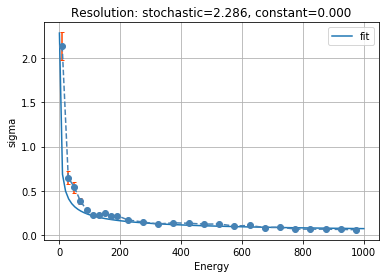

In [145]:
def reso(x,stoch,C):
    return np.sqrt(stoch**2/x + C**2 )




popt, pcov = curve_fit(f=reso,xdata=newbin, ydata=seoear, sigma=seoerar, p0=[1., 1.],bounds = ([0,0],[np.inf,np.inf]))
perr = np.sqrt(np.diag(pcov))
print(popt,perr)

x_interval_for_fit = np.linspace(1,1000, 100)
plt.plot(x_interval_for_fit, reso(x_interval_for_fit, *popt), label='fit')
plt.errorbar(newbin,(seoear), yerr=seoerar, fmt='o', ecolor='orangered',color='steelblue', capsize=2,ls='--');
plt.legend()


plt.xlabel('Energy')
plt.ylabel('sigma')
#plt.title(r'$\mathrm{pred - true / true:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.title('Resolution: stochastic=%.3f, constant=%.3f'%(popt[0], popt[1]))
print(popt,'\n',pcov)
plt.grid(True)

plt.show()

In [ ]:

for data in tqdm(loader):
    model.eval()
    data = data.to('cuda')
    result=model(data)
    print(data.y)
    print(result)
    break

In [ ]:
print(data_list[0].y)

#    cl = data_list[0].to('cuda')
#    cl.batch = torch.zeros(cl.x.shape[0], dtype=torch.int64).to('cuda:0')
#    val = model(cl)
#    print(val)
    #test(cl, batch).backward()
    #print(val)

In [ ]:
simentest= []
for i,data in tqdm(enumerate(testloader)):
    simentest.append(data.y.item())
    

In [ ]:
plt.hist(simentest, facecolor='green', alpha=0.75)
plt.xlabel('energy')
plt.title('Pion true energy')
plt.show()

In [57]:
torch.cuda.empty_cache()